In [73]:
# read csv file
import csv
import sys
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom


In [27]:
# read csv file in 'Re_ defibrillation codes\maskcirclenew1.csv', no def
data = []
with open('../Re_ defibrillation codes/maskcirclenew1.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader: # get rid of first two rows
        for i in row:
            data.append(int(i))

        data = data[2:]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..512].


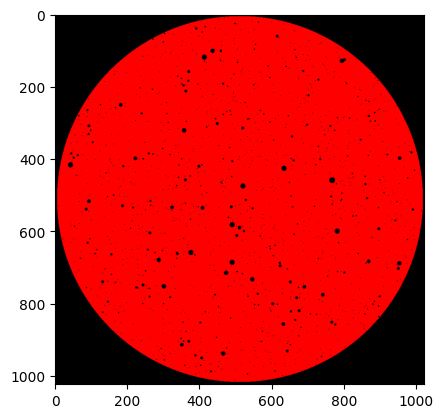

In [28]:
# data is length 1024*1024*4, visulize it in 1024*1024 map with rgba as order, with rgba, now if r = 0, put it blue, if r = 1, make it red
# dont modify data itself!!!!!!!

data_ = np.array(data).reshape((1024, 1024, 4))
plt.imshow(data_[..., :3] * 512)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..512].


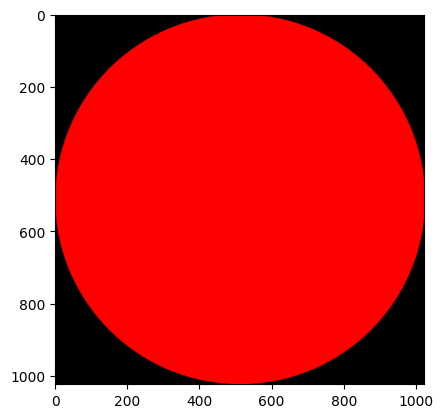

In [87]:
# now we modify pixels within circle all r channel from 0 to 1
for i in range(data_.shape[0]):
    for j in range(data_.shape[1]):
        if (i - 512) ** 2 + (j - 512) ** 2 <= (1024/2) ** 2:  # circle with radius 500
            data_[i, j] = [1, 0, 0, 0]  # red
plt.imshow(data_[..., :3] * 512)
plt.show()


In [88]:
# now save the data_ into same format csv file with first two values as 1024, 1024
# write into '../Re_ defibrillation codes/maskcircle.csv'
data_list = data_.flatten().tolist()
data_list = [1024, 1024] + data_list
with open('../Re_ defibrillation codes/maskcircle.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..512].


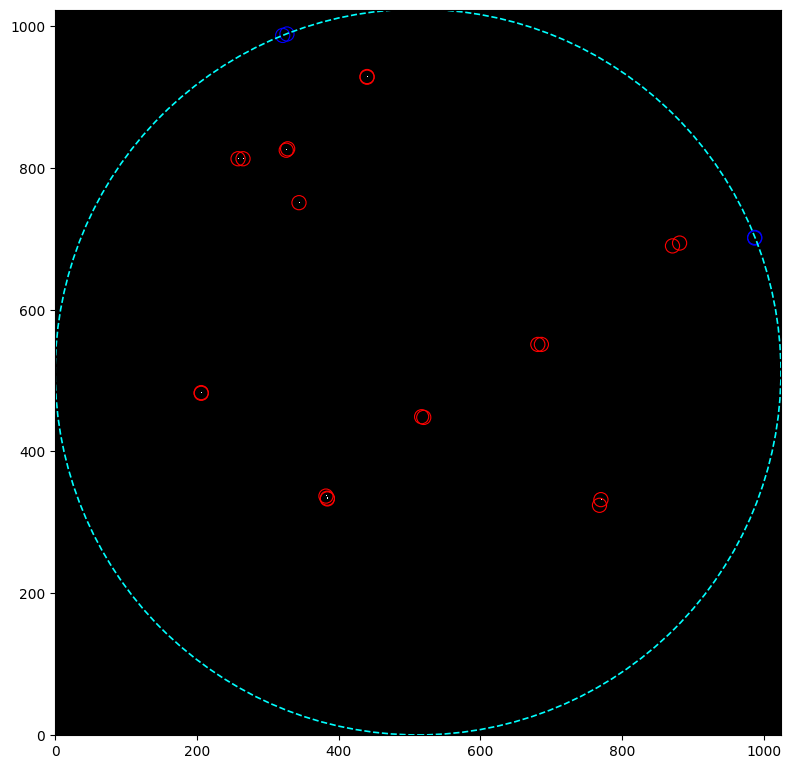

In [96]:
# read csv file in 'Re_ defibrillation codes\maskcirclenew1.csv', no def
csv.field_size_limit(sys.maxsize)

data = []
with open('../data/tipt_loc_118ms.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader: # get rid of first two rows
        for i in row:
            data.append(int(i))
data_ = np.array(data).reshape((1024, 1024, 4))

# now change all pixel [1,1,1,1] to [1 0 0 0] at circle with radius 512

epsilon = 100 * 512
for i in range(data_.shape[0]):
    for j in range(data_.shape[1]):
        if (512) ** 2 - epsilon <= (i - 512) ** 2 + (j - 512) ** 2 <= (512) ** 2 + epsilon:  # circle with radius 500
            if (data_[i, j] == [1, 1, 1, 1]).all():
                data_[i, j] = [1, 0, 0, 0]  # red

# assume data_ is shape (1024, 1024, 4)
# each pixel either [1,1,1,1] or [0,0,0,0]
mask = np.all(data_ == 1, axis=-1)   # True where pixel == [1,1,1,1]
mask_boundary = np.all(data_ == [1,0,0,0], axis=-1)
ys, xs = np.where(mask)
ybs,xbs = np.where(mask_boundary)

plt.figure(figsize=(8, 8))
plt.imshow(data_[..., :3] * 512, interpolation='nearest')

# draw small circles at each dot location
for (x, y) in zip(xs, ys):
    circ = plt.Circle((x, y), radius=10, color='red', fill=False, linewidth=0.8)
    plt.gca().add_patch(circ)
for (x, y) in zip(xbs, ybs):
    circ = plt.Circle((x, y), radius=10, color='blue', fill=False, linewidth=0.8)
    plt.gca().add_patch(circ)
center_circle = plt.Circle((512, 512), radius=512,
                           color='cyan', fill=False, linewidth=1.2, linestyle='--')
plt.gca().add_patch(center_circle)
plt.tight_layout()
# flip upside down
plt.gca().invert_yaxis()
plt.show()



In [87]:
# find all 1 idx in data
idxs = np.where(data_[..., 0] == 1)

In [88]:
idxs

(array([], dtype=int64), array([], dtype=int64))

In [58]:
data__ = data_[..., :3] * 512
data__[241,257]

array([512, 512, 512])

In [54]:
data_[241,257]

array([1, 1, 1, 1])